<a href="https://colab.research.google.com/github/sanchezduvanricardo/AnalisisDatosUNAD/blob/main/RegresionLogisticaUnad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [ ]:
#Cargar las librerias necesarias
import missingno as msno
import seaborn as sns
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# lectura de datos en Python y lo cargamos en la variable Datos
#from google.colab import files
#uploaded = files.upload()  # Te permite subir archivos desde tu PC
Datos = pd.read_csv("heart_cleveland_upload.csv")

In [ ]:
# lRenombramos las columnas a español para un mejor entendimeinto y analisis.
Datos = Datos.rename(columns={
    'age': 'edad',
    'sex': 'sexo',
    'cp': 'tipo_dolor_pecho',
    'trestbps': 'presion_arterial_reposo',
    'chol': 'colesterol',
    'fbs': 'azucar_ayuno',
    'restecg': 'electrocardiograma_reposo',
    'thalach': 'frecuencia_cardiaca_maxima',
    'exang': 'angina_por_ejercicio',
    'oldpeak': 'depresion_ST',
    'slope': 'pendiente_segmento_ST',
    'ca': 'vasos_coloreados',
    'thal': 'tipo_talasemia',
    'condition': 'enfermedad_cardiaca'
})

Datos.head(5)

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_ayuno,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_por_ejercicio,depresion_ST,pendiente_segmento_ST,vasos_coloreados,tipo_talasemia,enfermedad_cardiaca
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# Descripción de los datos
Datos.describe()

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_ayuno,electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_por_ejercicio,depresion_ST,pendiente_segmento_ST,vasos_coloreados,tipo_talasemia,enfermedad_cardiaca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


**2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.**

In [ ]:
# Ver cantidad de valores nulos por columna
print(Datos.isnull().sum())

edad                          0
sexo                          0
tipo_dolor_pecho              0
presion_arterial_reposo       0
colesterol                    0
azucar_ayuno                  0
electrocardiograma_reposo     0
frecuencia_cardiaca_maxima    0
angina_por_ejercicio          0
depresion_ST                  0
pendiente_segmento_ST         0
vasos_coloreados              0
tipo_talasemia                0
enfermedad_cardiaca           0
dtype: int64


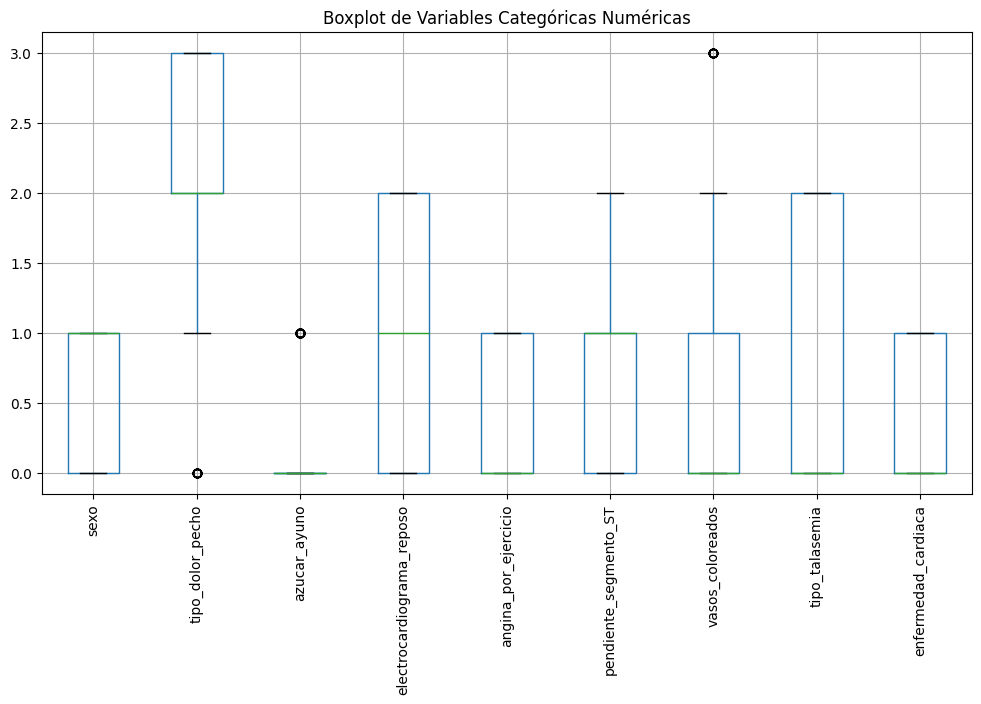

In [ ]:
# Variables categóricas numéricas
vars_categoricas = [
    'sexo', 'tipo_dolor_pecho', 'azucar_ayuno',
    'electrocardiograma_reposo', 'angina_por_ejercicio',
    'pendiente_segmento_ST', 'vasos_coloreados',
    'tipo_talasemia', 'enfermedad_cardiaca'
]

# Gráfico para variables categóricas numéricas
plt.figure(figsize=(12, 6))
Datos[vars_categoricas].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot de Variables Categóricas Numéricas')
plt.show()

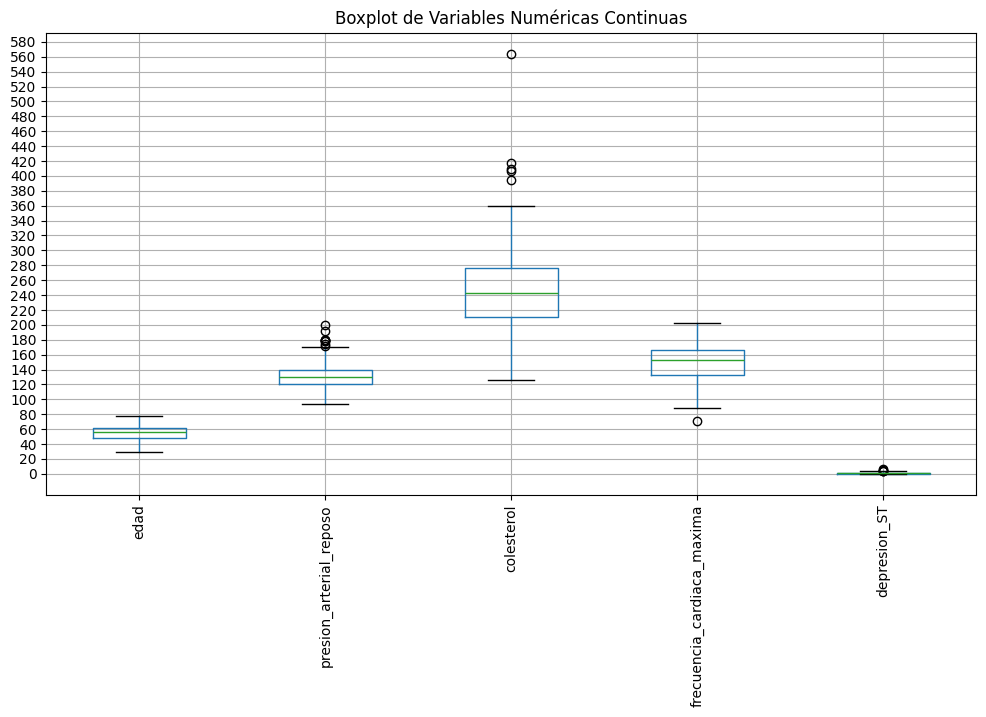

Número de valores atípicos por variable:
 edad                          0
presion_arterial_reposo       9
colesterol                    5
frecuencia_cardiaca_maxima    1
depresion_ST                  5
dtype: int64
Valores atípicos en presion_arterial_reposo: [178 192 180 172 174 200]
Valores atípicos en colesterol: [564 417 407 394 409]
Valores atípicos en frecuencia_cardiaca_maxima: [71]
Valores atípicos en depresion_ST: [4.2 6.2 4.4 5.6]


In [ ]:
# Variables numéricas continuas
vars_numericas = [
    'edad', 'presion_arterial_reposo', 'colesterol',
    'frecuencia_cardiaca_maxima', 'depresion_ST'
]


# Gráfico para variables numéricas continuas
plt.figure(figsize=(12, 6))
Datos[vars_numericas].boxplot()
plt.xticks(rotation=90)
plt.yticks(np.arange(0, Datos[vars_numericas].max().max() + 20, 20))
plt.title('Boxplot de Variables Numéricas Continuas')
plt.show()

# Calcular cuartiles e IQR solo para variables numéricas continuas
Q1 = Datos[vars_numericas].quantile(0.25)
Q3 = Datos[vars_numericas].quantile(0.75)
IQR = Q3 - Q1

# Detectar valores atípicos
outliers = ((Datos[vars_numericas] < (Q1 - 1.5 * IQR)) |
            (Datos[vars_numericas] > (Q3 + 1.5 * IQR)))

# Contar valores atípicos por variable
print("Número de valores atípicos por variable:\n", outliers.sum())

# Mostrar los valores atípicos detectados
for col in vars_numericas:
    valores_outliers = Datos.loc[outliers[col], col].unique()
    if len(valores_outliers) > 0:
        print(f"Valores atípicos en {col}: {valores_outliers}")

In [ ]:
# Reemplazar valores extremos por el percentil 95
def ajustar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_alto = Q3 + 1.5 * IQR  # Límite superior
    df[columna] = np.where(df[columna] > umbral_alto, umbral_alto, df[columna])

# Aplicar a las variables necesarias
#ajustar_outliers(Datos, 'presion_arterial_reposo')
ajustar_outliers(Datos, 'colesterol')
#ajustar_outliers(Datos, 'depresion_ST')

 **3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.**

In [ ]:
# Total de personas con nfermedad cardiaca

Datos['enfermedad_cardiaca'].value_counts()

,count
enfermedad_cardiaca,
0,160
1,137


**4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.**

In [ ]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('enfermedad_cardiaca',axis=1) # Se cargan los datos de train sin los datos de la columna enfermedad_cardiaca
Y = Datos['enfermedad_cardiaca'] # Se cargan los datos de train con los datos de la la columna enfermedad_cardiaca

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [ ]:
print (X_train)

     edad  sexo  tipo_dolor_pecho  presion_arterial_reposo  colesterol  \
234    56     0                 3                      200       288.0   
82     66     0                 2                      146       278.0   
36     56     1                 1                      120       240.0   
237    56     1                 3                      132       184.0   
133    47     1                 2                      108       243.0   
..    ...   ...               ...                      ...         ...   
291    40     1                 3                      110       167.0   
195    61     0                 3                      130       330.0   
170    65     0                 3                      150       225.0   
135    46     0                 2                      142       177.0   
293    39     1                 3                      118       219.0   

     azucar_ayuno  electrocardiograma_reposo  frecuencia_cardiaca_maxima  \
234             1                  

In [ ]:
print (X_test)

     edad  sexo  tipo_dolor_pecho  presion_arterial_reposo  colesterol  \
185    62     0                 3                      140       268.0   
157    70     1                 3                      145       174.0   
110    54     0                 2                      135       304.0   
39     56     1                 1                      130       221.0   
198    60     1                 3                      130       206.0   
..    ...   ...               ...                      ...         ...   
278    45     1                 3                      115       260.0   
163    67     1                 3                      100       299.0   
137    44     0                 2                      108       141.0   
33     57     0                 1                      130       236.0   
246    54     1                 3                      110       239.0   

     azucar_ayuno  electrocardiograma_reposo  frecuencia_cardiaca_maxima  \
185             0                  

**5. Entrenar el modelo configurando los diferentes hiperparámetros.**

In [ ]:
# Construir el modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [ ]:
X_test.head(10)
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


**6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.**


In [ ]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.89      0.89      0.89        35

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



**7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo**

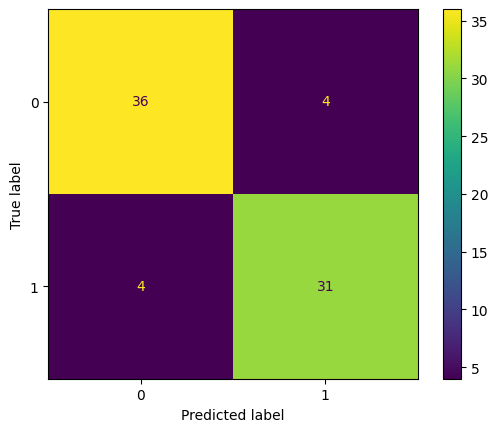

In [ ]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

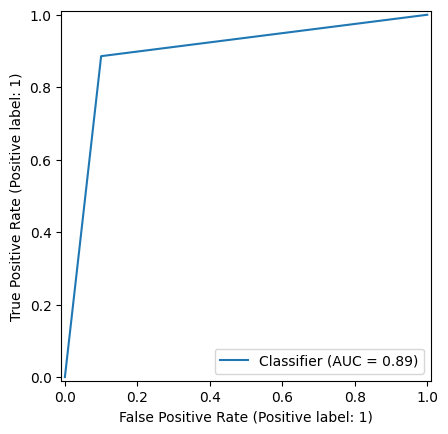

In [ ]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

**8.Interpretar, analizar y documentar los resultados obtenidos Del desempeño del modelo se puede describir:**


Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "enfermedad cardiaca" es 0,89, lo que significa que el 89% de los predichos con enfermedad cardiaca por el modelo tenian  en realidad enfermedad cardiaca.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "enfermedad_cardiaca" es 0.89, lo que indica que el modelo identificó correctamente al 89% de todos los diabéticos.

F1 Score: Es la media armónica de precisión y recall. Proporciona una puntuación única que equilibra la precisión y recall. Aquí la puntuación F1 para la clase "enfermedad_cardiaca" es 0.89, lo que indica un buen equilibrio entre precisión y recall.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos (TN): 36 (casos correctamente clasificados como clase 0)

Verdaderos positivos (TP): 31 (casos correctamente clasificados como clase 1)

Falsos positivos (FP): 4 (casos incorrectamente clasificados como clase 1 cuando eran clase 0)

Falsos negativos (FN): 4 (casos incorrectamente clasificados como clase 0 cuando eran clase 1)

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,89 lo que significa que el 89% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.
